In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image as Im
import numpy as np 
import pandas as pd
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer, f1_score, PrecisionRecallDisplay, precision_recall_curve, auc, average_precision_score, RocCurveDisplay
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
df1 = pd.read_csv("data/spam_data.csv")

In [4]:
df1['Spam/Ham'].value_counts()

Spam/Ham
spam    17171
ham     16545
Name: count, dtype: int64

In [5]:
df2 = pd.read_csv("data/full_dataset.csv")

In [6]:
df2 = df2[df2['category'] == 'spam']

In [7]:
df3 = pd.read_csv("data/emails.csv")

In [8]:
df3['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [9]:
df1 = df1[df1['Date'] > '2005']

In [10]:
df1.drop(['Message ID','Date'], axis = 1, inplace = True)

In [11]:
df1.rename({'Subject':'subject','Message':'message','Spam/Ham':'spam'}, axis = 1, inplace = True)

In [12]:
df1.head(3)

,subject,message,spam
4622,rate approved at 3 . 25,"hello ,\nwe tried contacting you awhile ago ab...",spam
4623,want your music for free ? we teach you how to...,press here to enter !\nmembership comes with :...,spam
4624,hey friend - the cheappesst v . 1 . c . 0 . d ...,"your wife needs this\nv ^ 1 - c ^ o , d - 1 . ...",spam


In [13]:
df2.drop(['id','text','category_id'], axis = 1, inplace = True)

In [14]:
df2.rename({'body':'message', 'category':'spam'}, axis = 1, inplace = True)

In [15]:
df2.head(3)

,subject,message,spam
1,Your Amazon was used on new device,Your $5000 refund is processed. Claim: bit.ly/...,spam
2,Re: Your Google inquiry,"Hi, following up about your Google application...",spam
6,PayPal Funds Release,$750 held for verification. Confirm: paypal-fu...,spam


In [16]:
df3['subject'] = df3['text'].str[8:100]

In [17]:
df3.rename({'text':'message'}, axis = 1, inplace = True)

In [18]:
df3

,message,spam,subject
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identit...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merril...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting ...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional ...
4,"Subject: do not have money , get software cds ...",1,"do not have money , get software cds from her..."
...,...,...,...
5723,Subject: re : research and development charges...,0,re : research and development charges to gpg ...
5724,"Subject: re : receipts from visit jim , than...",0,"re : receipts from visit jim , thanks again..."
5725,Subject: re : enron case study update wow ! a...,0,re : enron case study update wow ! all on th...
5726,"Subject: re : interest david , please , call...",0,"re : interest david , please , call shirley..."


**Combaining data into single dataframe**

In [19]:
df1.head(3)

,subject,message,spam
4622,rate approved at 3 . 25,"hello ,\nwe tried contacting you awhile ago ab...",spam
4623,want your music for free ? we teach you how to...,press here to enter !\nmembership comes with :...,spam
4624,hey friend - the cheappesst v . 1 . c . 0 . d ...,"your wife needs this\nv ^ 1 - c ^ o , d - 1 . ...",spam


In [20]:
df1['spam'].value_counts()

spam
spam    9590
Name: count, dtype: int64

In [21]:
df2.head(3)

,subject,message,spam
1,Your Amazon was used on new device,Your $5000 refund is processed. Claim: bit.ly/...,spam
2,Re: Your Google inquiry,"Hi, following up about your Google application...",spam
6,PayPal Funds Release,$750 held for verification. Confirm: paypal-fu...,spam


In [22]:
df2['spam'].value_counts()

spam
spam    2243
Name: count, dtype: int64

In [23]:
df3.head(3)

,message,spam,subject
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identit...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merril...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting ...


In [24]:
df3['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

Since df1 and df2 have only spam emails lets extracr only 1000 from df1 in order to avoid disbalance in our data where spam emails will dominate 
non spam

In [25]:
# draw 3000 random rows (without replacement)
sample_df = df1.sample(n=1000, random_state=42).reset_index(drop=True)

In [26]:
sample_df['spam'] = sample_df['spam'].replace('spam', 1)
df2['spam'] = df2['spam'].replace('spam', 1)

C:\Users\Bagdo\AppData\Local\Temp\ipykernel_444\3844277310.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sample_df['spam'] = sample_df['spam'].replace('spam', 1)
C:\Users\Bagdo\AppData\Local\Temp\ipykernel_444\3844277310.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['spam'] = df2['spam'].replace('spam', 1)


In [27]:
sample_df = sample_df.dropna()

In [28]:
df1 = df1.dropna()

In [29]:
df = pd.concat([df3,df2,sample_df])

**The final dataframe**

In [30]:
df.head(3)

,message,spam,subject
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identit...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merril...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting ...


In [31]:
df.to_csv("data/final_dataset.csv")

In [32]:
df['spam'].value_counts()

spam
1    4601
0    4360
Name: count, dtype: int64

**EDA**

In [33]:
df['length'] = df['message'].apply(lambda x: len(x.split())) + df['subject'].apply(lambda x: len(x.split())) 

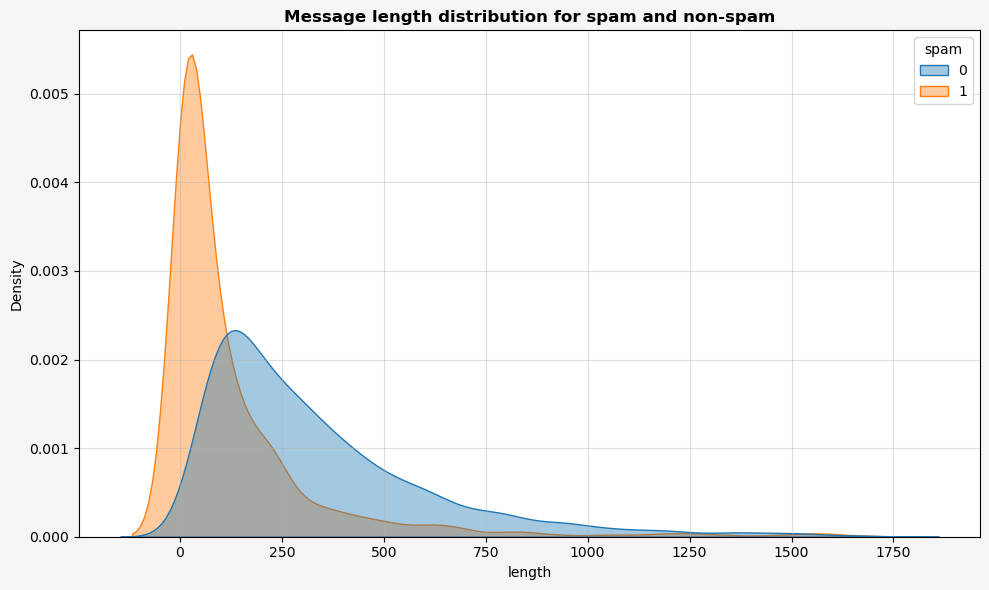

In [34]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='whitesmoke')

q_low, q_high = df['length'].quantile([0.01, 0.99])
filtered_data = df[(df['length'] >= q_low) & (df['length'] <= q_high)]

sns.kdeplot(data=filtered_data, x='length', ax=ax, hue='spam', fill=True, common_norm=False, alpha=0.4)

ax.set_title(f"Message length distribution for spam and non-spam", weight='bold')

ax.set_ylabel('Density')
ax.set_xlabel('length')
ax.grid(alpha=0.4)

plt.tight_layout()

plt.show()

**Cleaning**

In [35]:
df

,message,spam,subject,length
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identit...,338
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merril...,103
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting ...,103
3,Subject: 4 color printing special request add...,1,4 color printing special request additional ...,113
4,"Subject: do not have money , get software cds ...",1,"do not have money , get software cds from her...",73
...,...,...,...,...
995,"hello , welcome to the medzonli robbery ne\n- ...",1,great offrr,68
996,"hello account # 6990306 ,\nyour application wa...",1,your application was accepted,85
997,dear rait @ bruce - guenter . dyndns . org :\n...,1,"wow , your never online anyore . .",84
998,?? eshopkey\n( http : / / www . eshopkey . net...,1,eshopkey + ??????????? !,315


In [36]:
def preprocess(text, stop_words, lemmatizer = nltk.WordNetLemmatizer):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    text = list(filter(str.isalpha, word_tokenize(text.lower())))
    text = ' '.join([lemmatizer.lemmatize(word) for word in text])

    return text

In [37]:
stop_words = set(stopwords.words('english') + ['ha', 'wa', 'say', 'said', 'u'])
lemmatizer = nltk.WordNetLemmatizer()
df['clean_text'] = df['message'].apply(preprocess, stop_words=stop_words, lemmatizer=lemmatizer)

In [38]:
df['clean_text'] = df['clean_text'].str.replace(
    r'\b[sS]\w{5,7}\b:?',  # matches "subject" with typos and optional colon
    '', 
    regex=True
).str.strip()

In [39]:
# Combine all words from preprocessed column
all_words = ' '.join(df['clean_text']).split()
word_freq = Counter(all_words)

In [40]:
# Set frequency threshold (e.g., remove words appearing < 3 times)
threshold = 3
rare_words = set([word for word, freq in word_freq.items() if freq < threshold])
def remove_rare(text):
    return ' '.join([word for word in text.split() if word not in rare_words])

df['clean_text'] = df['clean_text'].apply(remove_rare)

**Word Cloud**

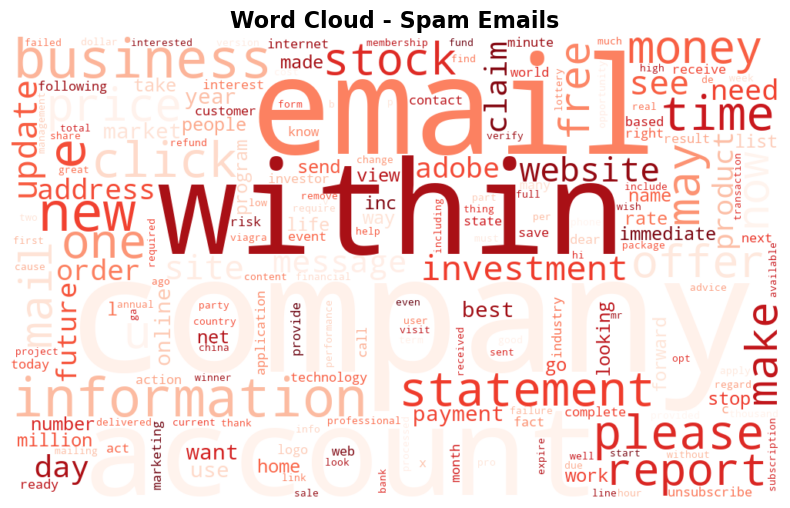

In [41]:

# Filter only spam emails
spam_emails = df[df['spam'] == 1]

# Combine all spam messages into a single string
spam_text = " ".join(spam_emails['clean_text'])

# Generate the word cloud
wc = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='Reds',
    max_words=200,
    collocations=False
).generate(spam_text)

# Display
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Spam Emails", fontsize=16, weight='bold')
plt.show()


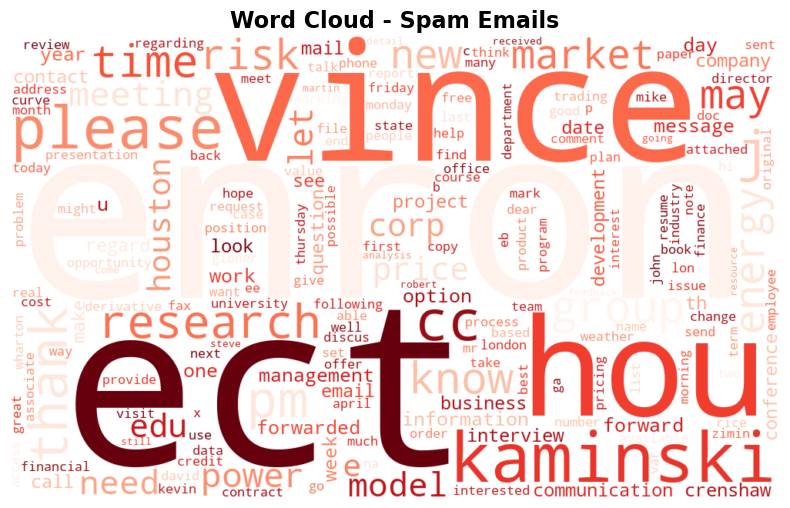

In [42]:

# Filter only spam emails
spam_emails = df[df['spam'] == 0]

# Combine all spam messages into a single string
spam_text = " ".join(spam_emails['clean_text'])

# Generate the word cloud
wc = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    colormap='Reds',
    max_words=200,
    collocations=False
).generate(spam_text)

# Display
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Spam Emails", fontsize=16, weight='bold')
plt.show()


<Axes: >

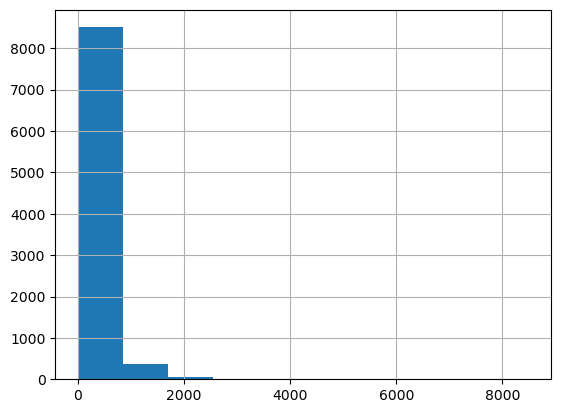

In [43]:
df['length'].hist()

In [44]:
upper_limit = df['length'].quantile(0.95)
df = df[df['length'] <= upper_limit]

<Axes: >

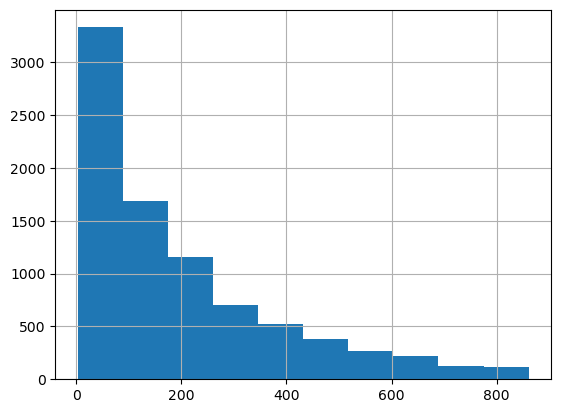

In [45]:
df['length'].hist()

In [46]:
df.groupby('spam').agg({'length':'mean'})

,length
spam,
0,286.896594
1,108.137637


In [47]:
df = df.drop(['message'], axis = 1)
df.rename({'clean_text':'message'}, axis = 1, inplace = True)

In [48]:
df.to_csv("data/final_dataset.csv", index = False)